# **Resume Analysis**

---


Installing Required Libraries

In [117]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install PyPDF2
!pip install spacy==3.5.3
!python -m spacy download en_core_web_sm

2024-11-10 13:27:14.540188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-10 13:27:14.565391: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-10 13:27:14.573491: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-10 13:27:14.591644: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-10 13:27:16.090994: W tensorflow/compiler/tf2

In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
from PyPDF2 import PdfReader

Load the Dataset

In [120]:
data = pd.read_csv('/content/drive/MyDrive/ML Project/UpdatedResumeDataSet.csv')

Display the first few rows of the dataset

In [121]:
print("Dataset Sample:")
print(data.head(20))

Dataset Sample:
        Category                                             Resume
0   Data Science  Skills * Programming Languages: Python (pandas...
1   Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2   Data Science  Areas of Interest Deep Learning, Control Syste...
3   Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4   Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
5   Data Science  SKILLS C Basics, IOT, Python, MATLAB, Data Sci...
6   Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7   Data Science  Education Details \r\n B.Tech   Rayat and Bahr...
8   Data Science  Personal Skills â¢ Ability to quickly grasp t...
9   Data Science  Expertise â Data and Quantitative Analysis â...
10  Data Science  Skills * Programming Languages: Python (pandas...
11  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
12  Data Science  Areas of Interest Deep Learning, Control Syste...
13  Data Science  Skills â¢ R â

Checking the distribution of categories in the dataset

<ipython-input-122-dba182e42cba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['Category'], order=data['Category'].value_counts().index, palette='viridis')


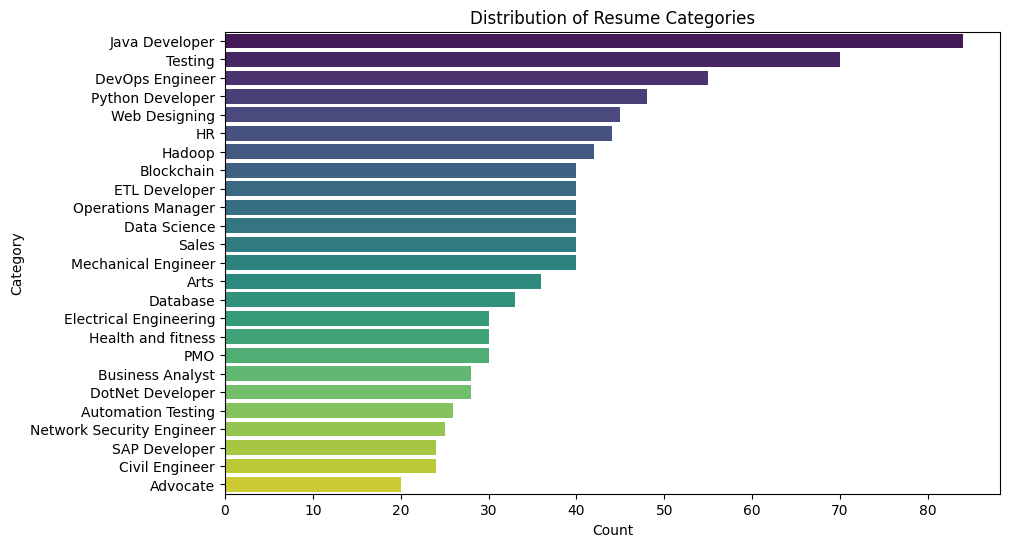

In [122]:
plt.figure(figsize=(10, 6))
sns.countplot(y=data['Category'], order=data['Category'].value_counts().index, palette='viridis')
plt.title("Distribution of Resume Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

Display category count for each type

In [123]:
print("Category Counts:")
print(data['Category'].value_counts())

Category Counts:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


Separating features and labels


In [124]:
X = data['Resume']  # Resume content
y = data['Category']  # Target labels (job categories)

Vectorizing the resumes using TF-IDF

In [125]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

Split the data into training and test sets

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

Initialize and train the Random Forest Classifier

In [127]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Predict on the test set

In [128]:
y_pred = rf_classifier.predict(X_test)

Print accuracy score

In [129]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.98


Display classification report

In [130]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      0.33      0.50         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       0.86      1.00      0.92        12
                   Hadoop       1.00  

Distribution of Categories in Dataset


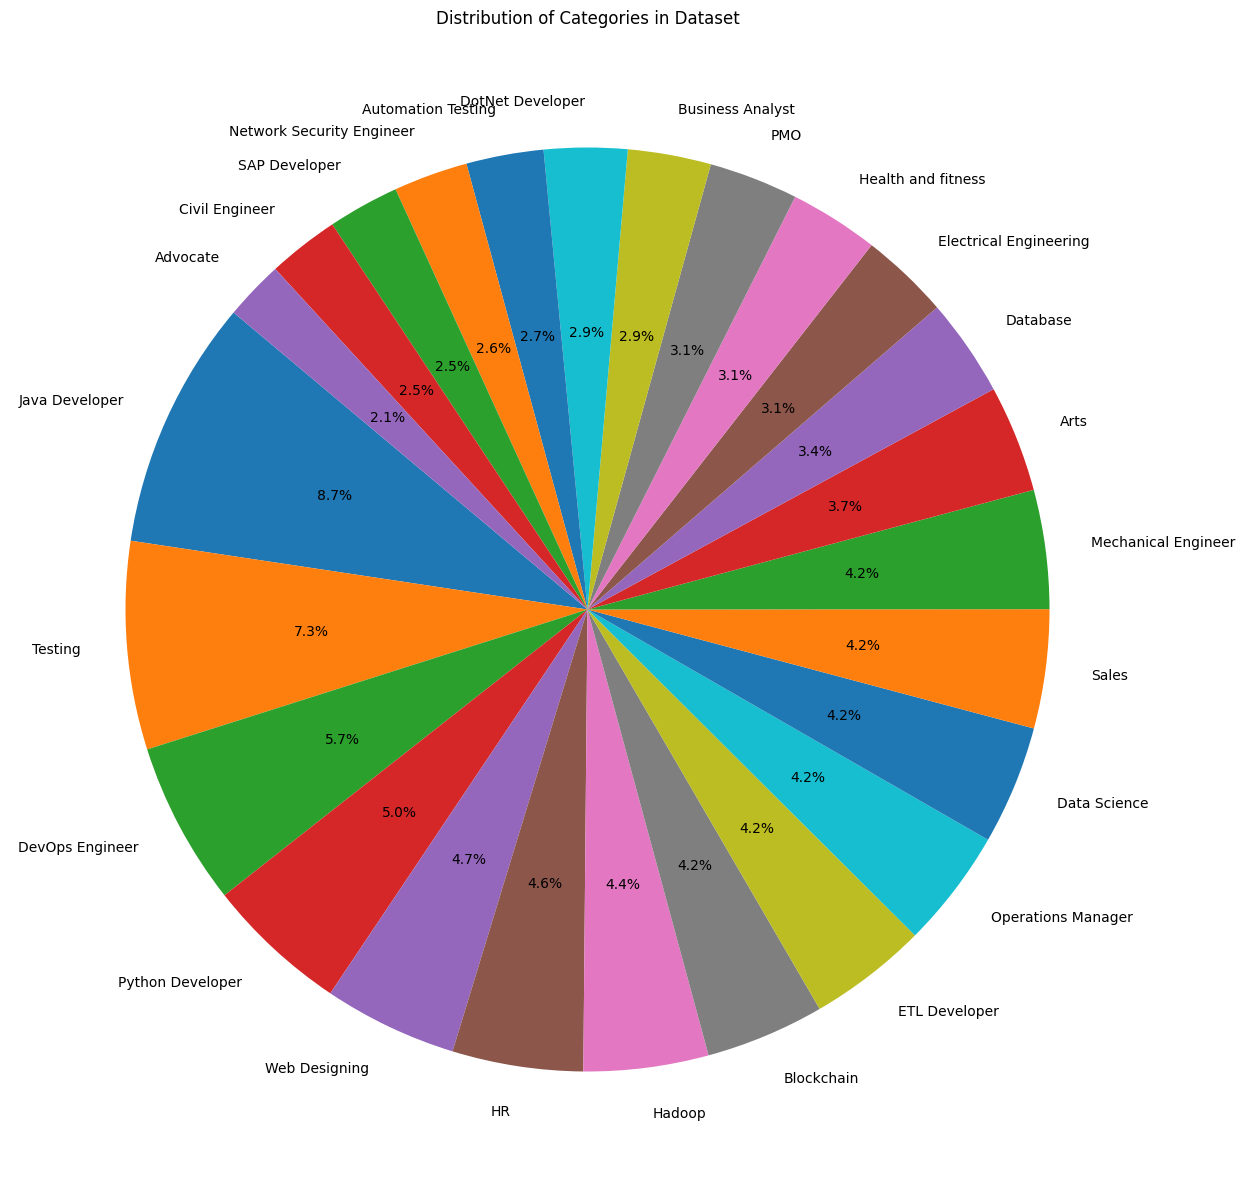

In [131]:
category_counts = y.value_counts()

# Plot a pie chart
plt.figure(figsize=(15, 15))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Categories in Dataset")
plt.show()

Display confusion matrix as a heatmap

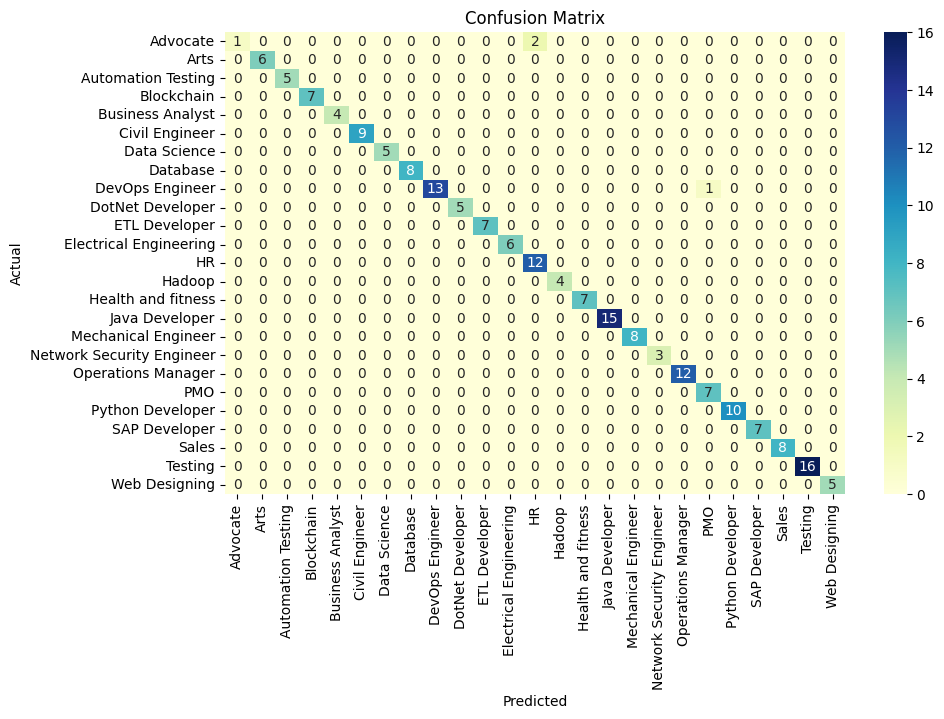

In [132]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Save the model and vectorizer

In [133]:
pickle.dump(rf_classifier, open('resume_classifier_model.pkl', 'wb'))
pickle.dump(tfidf_vectorizer, open('tfidf_vectorizer.pkl', 'wb'))

Function to extract text from a PDF file

In [134]:
def extract_text_from_pdf(file_path):
    text = ""
    reader = PdfReader(file_path)
    for page in reader.pages:
        text += page.extract_text() or ""
    return text

Function to read text from a .txt file

In [135]:
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

Function to classify a resume from a file upload

* Determine file type and extract text  
* Vectorize the resume text
* Predict the category
* Output the predicted category



In [136]:
def classify_resume_from_file(file_path):
    # Load the trained model and TF-IDF vectorizer
    rf_classifier = pickle.load(open('resume_classifier_model.pkl', 'rb'))
    tfidf_vectorizer = pickle.load(open('tfidf_vectorizer.pkl', 'rb'))

    # Determine file type and extract text
    if file_path.endswith('.pdf'):
        resume_text = extract_text_from_pdf(file_path)
    elif file_path.endswith('.txt'):
        resume_text = read_text_file(file_path)
    else:
        raise ValueError("Unsupported file format. Only .pdf and .txt are allowed.")

    # Vectorize the resume text
    resume_tfidf = tfidf_vectorizer.transform([resume_text])

    # Predict the category
    prediction = rf_classifier.predict(resume_tfidf)

    # Output the predicted category
    return prediction[0]



Upload resume

In [137]:
file_path = '/content/GORREPATI-VARSHITH-Resume.pdf'  # Replace with your file path
predicted_category = classify_resume_from_file(file_path)
print(f"Predicted Category: {predicted_category}")

Predicted Category: Python Developer


**Resume Parsing**


---



Importing Required Libraries

In [138]:
import re
import pandas as pd
from PyPDF2 import PdfReader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from difflib import SequenceMatcher
import pickle

Load the pre-trained Random Forest Classifier and TF-IDF Vectorizer

In [139]:
with open("tfidf_vectorizer.pkl", "rb") as tfidf_file:
    tfidf_vectorizer = pickle.load(tfidf_file)
with open("resume_classifier_model.pkl", "rb") as model_file:
    random_forest_model = pickle.load(model_file)

 Function to extract information from the resume

In [140]:
def extract_text_from_pdf(file_path):
    """Extract text from a PDF file."""
    try:
        pdf_reader = PdfReader(file_path)
        text = ""
        for page in pdf_reader.pages:
            text += page.extract_text() if page.extract_text() else ''
        return text.strip()
    except Exception as e:
        print(f"Error extracting text: {e}")
        return ''

def read_text_file(file_path):
    """Read text from a .txt file."""
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read().strip()
    except Exception as e:
        print(f"Error reading text file: {e}")
        return ''

def clean_text(text):
    """Preprocess and clean text."""
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.lower().strip()

def extract_contact_info(text):
    """Extract contact information (name, email, phone number) from the text."""
    contact_info = {}

    # Extract email
    email = re.search(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', text)
    contact_info['email'] = email.group(0) if email else 'Not found'

    # Extract phone number
    phone = re.search(r'\b(?:\+?\d{1,3}[-.\s]?)?(?:\(?\d{3}\)?[-.\s]?)?\d{3}[-.\s]?\d{4}\b', text)
    contact_info['phone'] = phone.group(0) if phone else 'Not found'

    return contact_info


def extract_education_from_resume(text):
    """Extract educational qualifications from resume text."""
    # Define the qualifications pattern
    pattern = r"Bsc|B\. Pharmacy|B Pharmacy|Msc|M\. Pharmacy|Ph\.D|Bachelor|Master|B.tech"
    matches = re.findall(pattern, text, re.IGNORECASE)
    matches = [match.strip() for match in matches]

    # If only one match, return it directly
    if len(matches) == 1:
        return matches[0]

    # Check if all matches are 100% similar
    def all_matches_similar(matches):
        for i in range(1, len(matches)):
            similarity = SequenceMatcher(None, matches[0], matches[i]).ratio()
            if similarity < 1.0:
                return False
        return True

    if all_matches_similar(matches):
        return matches  # Return all matches if 100% similar
    elif matches:
        return matches[0]  # Return the first match as the main result

    return None


def extract_skills(text, skill_keywords):
    """Extract skills from text based on predefined skill keywords."""
    skills_found = [skill for skill in skill_keywords if skill.lower() in text]
    return skills_found if skills_found else "Not found"

def parse_and_classify_resume(file_path, skill_keywords):
    """Parse and classify resume file content, extracting key information."""
    if file_path.endswith('.pdf'):
        resume_text = extract_text_from_pdf(file_path)
    elif file_path.endswith('.txt'):
        resume_text = read_text_file(file_path)
    else:
        raise ValueError("Unsupported file format. Only .pdf and .txt are allowed.")

    if not resume_text:
        raise ValueError("The resume text could not be extracted.")

    # Clean and preprocess text
    cleaned_text = clean_text(resume_text)

    # Extract contact information
    contact_info = extract_contact_info(resume_text)

    # Extract  education
    education = extract_education_from_resume(resume_text)

    # Extract skills
    skills = extract_skills(cleaned_text, skill_keywords)

    # Convert text to TF-IDF vector for classification
    with open('tfidf_vectorizer.pkl', 'rb') as tfidf_file:
        tfidf_vectorizer = pickle.load(tfidf_file)
    text_vector = tfidf_vectorizer.transform([cleaned_text])

    # Load the trained Random Forest model and classify resume
    with open('resume_classifier_model.pkl', 'rb') as model_file:
        random_forest_model = pickle.load(model_file)
    classification = random_forest_model.predict(text_vector)

    return {
        "classification": classification[0],
        "contact_info": contact_info,
        "education": education if education else "Not found",
        "skills": skills
    }

# Example usage
file_path = "/content/GORREPATI-VARSHITH-Resume.pdf"

file_path1 = '/content/drive/MyDrive/ML Project/skill.csv'
data = pd.read_csv(file_path1)

# Extract all column names
skill_keywords = list(data['Skills'])

try:
    result = parse_and_classify_resume(file_path, skill_keywords)
    print("Resume Parsing Result:")
    print("Classification:", result['classification'])
    print("Contact Info:")
    print(f"Email: {result['contact_info']['email']}")
    print(f"Phone: {result['contact_info']['phone']}")
    print("Education:", result['education'])
    print("Skills:", result['skills'])
except ValueError as e:
    print(e)


Resume Parsing Result:
Classification: Python Developer
Contact Info:
Email: varshithgorrepati3366@gmail.com
Phone: 9398604779
Education: B.Tech
Skills: ['Python', 'Go', 'R', 'SQL', 'Git', 'C', 'D', 'Io', 'J', 'Red', 'Ring']


Ranking Resumes

In [147]:
import os
import re
import pickle
from PyPDF2 import PdfReader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def extract_text_from_pdf(file_path):
    """Extract text from a PDF file."""
    try:
        pdf_reader = PdfReader(file_path)
        text = ''
        for page in pdf_reader.pages:
            text += page.extract_text() if page.extract_text() else ''
        return text.strip()
    except Exception as e:
        print(f"Error reading PDF file: {e}")
        return ''

def read_text_file(file_path):
    """Read text from a .txt file."""
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read().strip()
    except Exception as e:
        print(f"Error reading text file: {e}")
        return ''

def clean_text(text):
    """Preprocess and clean text."""
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.lower().strip()

def load_resumes(file_paths):
    """Load resumes from file paths, clean, and return text data."""
    resumes = []
    for path in file_paths:
        if path.endswith('.pdf'):
            resume_text = extract_text_from_pdf(path)
        elif path.endswith('.txt'):
            resume_text = read_text_file(path)
        else:
            print(f"Unsupported file format for {path}")
            continue
        resumes.append(clean_text(resume_text))
    return resumes

def rank_resumes_by_job_role(job_role, resume_paths):
    """Rank resumes based on their relevance to a given job role."""

    # Clean and preprocess job role text
    job_role_cleaned = clean_text(job_role)

    # Load and preprocess resumes
    resume_texts = load_resumes(resume_paths)

    # Combine job role and resume texts for vectorization
    documents = [job_role_cleaned] + resume_texts

    # Vectorize using TF-IDF
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

    # Calculate cosine similarity between the job role and each resume
    job_role_vector = tfidf_matrix[0]  # First document is the job role
    resume_vectors = tfidf_matrix[1:]  # Remaining documents are resumes

    similarities = cosine_similarity(job_role_vector, resume_vectors).flatten()

    # Rank resumes based on cosine similarity scores
    ranked_indices = np.argsort(similarities)[::-1]

    # Output ranked resume paths with similarity scores
    ranked_resumes = [(resume_paths[i], similarities[i]) for i in ranked_indices]

    return ranked_resumes

# Example usage
job_role_description = "Data Scientist with expertise in machine learning, Python, and data analysis."
resume_files = [
    "/content/GORREPATI-VARSHITH-Resume.pdf",
    "/content/drive/MyDrive/ML Project/Namala data resume.pdf",
    "/content/drive/MyDrive/ML Project/Namala Resume.pdf"
]

# Rank resumes by relevance to the job role
ranked_resumes = rank_resumes_by_job_role(job_role_description, resume_files)

print("Ranked Resumes:")
for i, (resume, score) in enumerate(ranked_resumes, 1):
    print(f"{i}. {resume} - Similarity Score: {score:.4f}")


Ranked Resumes:
1. /content/drive/MyDrive/ML Project/Namala data resume.pdf - Similarity Score: 0.2387
2. /content/drive/MyDrive/ML Project/Namala Resume.pdf - Similarity Score: 0.0781
3. /content/GORREPATI-VARSHITH-Resume.pdf - Similarity Score: 0.0704


In [151]:
import os
import re
import pickle
from PyPDF2 import PdfReader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def extract_text_from_pdf(file_path):
    """Extract text from a PDF file."""
    try:
        pdf_reader = PdfReader(file_path)
        text = ''
        for page in pdf_reader.pages:
            text += page.extract_text() if page.extract_text() else ''
        return text.strip()
    except Exception as e:
        print(f"Error reading PDF file: {e}")
        return ''

def read_text_file(file_path):
    """Read text from a .txt file."""
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read().strip()
    except Exception as e:
        print(f"Error reading text file: {e}")
        return ''

def clean_text(text):
    """Preprocess and clean text."""
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.lower().strip()

def load_resumes(file_paths):
    """Load resumes from file paths, clean, and return text data."""
    resumes = []
    for path in file_paths:
        if path.endswith('.pdf'):
            resume_text = extract_text_from_pdf(path)
        elif path.endswith('.txt'):
            resume_text = read_text_file(path)
        else:
            print(f"Unsupported file format for {path}")
            continue
        resumes.append(clean_text(resume_text))
    return resumes

def rank_resumes_by_job_role(job_role, resume_paths):
    """Rank resumes based on their relevance to a given job role."""

    # Clean and preprocess job role text
    job_role_cleaned = clean_text(job_role)

    # Load and preprocess resumes
    resume_texts = load_resumes(resume_paths)

    # Combine job role and resume texts for vectorization
    documents = [job_role_cleaned] + resume_texts

    # Vectorize using TF-IDF
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

    # Calculate cosine similarity between the job role and each resume
    job_role_vector = tfidf_matrix[0]  # First document is the job role
    resume_vectors = tfidf_matrix[1:]  # Remaining documents are resumes

    similarities = cosine_similarity(job_role_vector, resume_vectors).flatten()

    # Rank resumes based on cosine similarity scores (starting from 1)
    ranked_indices = np.argsort(similarities)[::-1]

    # Output ranked resume paths with similarity scores
    ranked_resumes = [(resume_paths[i], similarities[i]) for i in ranked_indices]

    # Print ranked resumes with similarity scores
    print("Ranked Resumes:")
    for rank, (path, score) in enumerate(ranked_resumes, start=1):
        print(f"{rank}. {path} - Similarity Score: {score:.4f}  -  Rank of the resume: {rank}")

# Example usage
job_role_description = "Data Scientist with expertise in machine learning, Python, and data analysis."
resume_files = [
    "/content/GORREPATI-VARSHITH-Resume.pdf",
    "/content/drive/MyDrive/ML Project/Namala data resume.pdf",
    "/content/drive/MyDrive/ML Project/Namala Resume.pdf",
    "/resume_sde.pdf"
]

# Rank resumes by relevance to the job role
rank_resumes_by_job_role(job_role_description, resume_files)


Ranked Resumes:
1. /content/drive/MyDrive/ML Project/Namala data resume.pdf - Similarity Score: 0.2163  -  Rank of the resume: 1
2. /resume_sde.pdf - Similarity Score: 0.1688  -  Rank of the resume: 2
3. /content/drive/MyDrive/ML Project/Namala Resume.pdf - Similarity Score: 0.0761  -  Rank of the resume: 3
4. /content/GORREPATI-VARSHITH-Resume.pdf - Similarity Score: 0.0610  -  Rank of the resume: 4
